### Heroes Of Pymoli Data Analysis
* Of the 1163 active players, the vast majority are male (84%). There also exists, a smaller, but notable proportion of female players (14%).

* Our peak age demographic falls between 20-24 (44.8%) with secondary groups falling between 15-19 (18.60%) and 25-29 (13.4%).  
-----

### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np

# File to Load (Remember to Change These)
file = "Resources/purchase_data.csv"

# Read Purchasing File and store into Pandas data frame
heroes_data = pd.read_csv(file)

## Player Count

* Display the total number of players


In [2]:
heroes_data.head()

,Purchase ID,SN,Age,Gender,Item ID,Item Name,Price
0,0,Lisim78,20,Male,108,"Extraction, Quickblade Of Trembling Hands",3.53
1,1,Lisovynya38,40,Male,143,Frenzied Scimitar,1.56
2,2,Ithergue48,24,Male,92,Final Critic,4.88
3,3,Chamassasya86,24,Male,100,Blindscythe,3.27
4,4,Iskosia90,23,Male,131,Fury,1.44


In [3]:
# This block finds number of players with.counts, then creates new dataframe with the length 
player_count = heroes_data["SN"].value_counts()
player_total = [{"Total Players": len(player_count)}]
players_df = pd.DataFrame(player_total)
players_df

,Total Players
0,576


## Purchasing Analysis (Total)

* Run basic calculations to obtain number of unique items, average price, etc.


* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame

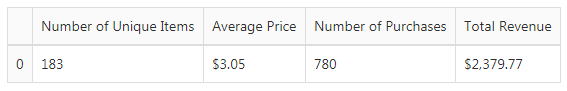

In [4]:
# Unique function to count the number of unique items
unique_items = heroes_data["Item ID"].unique()
unique_items = len(unique_items)

# Mean function to find average cost, and formatting
avg_price = heroes_data["Price"].mean()
avg_price = "${:,}".format(round(avg_price,2))

# Counts function to find number of purchases
num_purchases = heroes_data["Purchase ID"].value_counts()
num_purchases = len(num_purchases)

# Sum function to find total revenue, and formatting
total_rev = heroes_data["Price"].sum()
total_rev = "${:,}".format(total_rev)

# Create new dictionary, then dataframe to display data in a table
purchase_analysis = [{
    "Number of Unique Items": unique_items,
    "Average Price": avg_price,
    "Number of Purchases": num_purchases,
    "Total Revenue":total_rev,
}]

pa_df = players_df = pd.DataFrame(purchase_analysis)
pa_df = pa_df[['Number of Unique Items','Average Price','Number of Purchases','Total Revenue']]
pa_df

,Number of Unique Items,Average Price,Number of Purchases,Total Revenue
0,183,$3.05,780,"$2,379.77"


## Gender Demographics

* Percentage and Count of Male Players


* Percentage and Count of Female Players


* Percentage and Count of Other / Non-Disclosed

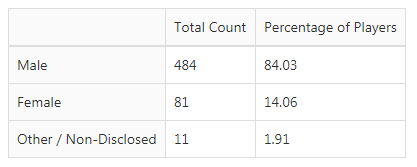


In [5]:
#################################
#            METHOD 1           #
#################################

# Drops duplicates in the Screen Name to leave only unique users
unique_sn_df = heroes_data.drop_duplicates(subset ="SN", keep = 'first')
len(unique_sn_df)

# Use Masking to find only Male values in "Gender" column. Then calculate.
gender_male = unique_sn_df[unique_sn_df["Gender"] == "Male"]
num_male = len(gender_male)
perc_male = len(gender_male)/len(unique_sn_df["SN"])
perc_male = "{:.2%}".format(perc_male)

# Use Masking to find only Female values in "Gender" column. Then calculate.
gender_female = unique_sn_df[unique_sn_df["Gender"] == "Female"]
num_female = len(gender_female)
perc_female = len(gender_female)/len(unique_sn_df["SN"])
perc_female = "{:.2%}".format(perc_female)

# Use Masking to find only Other values in "Gender" column. Then calculate.
gender_other = unique_sn_df[unique_sn_df["Gender"] == "Other / Non-Disclosed"]
num_other = len(gender_other)
perc_other = len(gender_other)/len(unique_sn_df["SN"])
perc_other = "{:.2%}".format(perc_other)

# Create new dictionary, then dataframe to display data in a table
gender_analysis = {
         '' : ['Male', 'Female', 'Other'],
         'Total Count' : [num_male, num_female, num_other],
         'Percentage of Players' : [perc_male, perc_female, perc_other],
}

gender_df = pd.DataFrame(gender_analysis)
gender_df.set_index(keys=['','Total Count','Percentage of Players'], inplace=True)
gender_df

,,
,Total Count,Percentage of Players
Male,484,84.03%
Female,81,14.06%
Other,11,1.91%


In [6]:
#################################
#            METHOD 2           #
#################################

# Create dataframe of just User Name and Gender
new_df = heroes_data[["SN", "Gender"]] 
#NOTE: With one bracket and 1 argument will return a series. Double brackets for 2 arguments.

# Drops duplicates of user
new_df.drop_duplicates(keep = 'first', inplace = True)

# This takes the unique item dataframe, groups by gender, and outputs the counts
df_groupby = new_df.groupby("Gender")
groupby_count = df_groupby.count()

# This creates a new column, calculating the percentage
groupby_count["Percentage"] = (groupby_count/(len(new_df)))

# Set up output table for Gender Analysis
columns_renamed = {'SN': 'Total Count',
 'Percentage': 'Percentage of Players'}

groupby_count = groupby_count.rename(columns=columns_renamed)
groupby_count
groupby_count.style.format({'Percentage of Players': "{:.2%}"})

C:\Users\T430s\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,Total Count,Percentage of Players
Gender,,
Female,81,14.06%
Male,484,84.03%
Other / Non-Disclosed,11,1.91%



## Purchasing Analysis (Gender)

* Run basic calculations to obtain purchase count, avg. purchase price, avg. purchase total per person etc. by gender




* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame

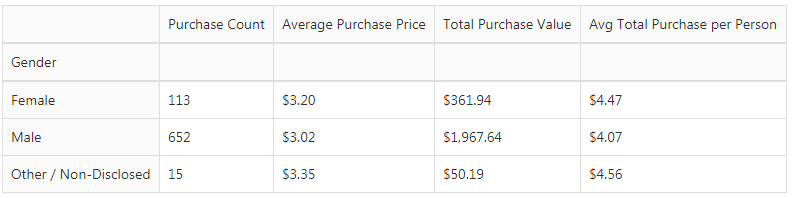

In [8]:
# Create dataframe of variables we are interested in
df_purchasing = heroes_data[["SN","Gender","Purchase ID","Price"]] 

# This takes the purchasing dataframe, groups by gender, and outputs the counts
df_groupby_gender = df_purchasing.groupby("Gender")

# Establish all calculations for output
#-------------------------------------#
# These are SERIES to be passed in final dataframe, using the GENDER-GROUPED dataframe for each referenced column.

purchase_count = df_groupby_gender["Gender"].count()

avg_purchase_price = df_groupby_gender["Price"].mean()
new_purchase_price = avg_purchase_price.map('${:,.2f}'.format)

total_purchase_value = purchase_count*avg_purchase_price
new_purchase_value = total_purchase_value.map('${:,.2f}'.format)

total_purchase_pp = df_groupby_gender["Price"].sum()
unique = df_groupby_gender["SN"].nunique()

avg_purchase_pp = total_purchase_pp/unique
new_purchase_pp = avg_purchase_pp.map('${:,.2f}'.format)

# Create summary table
purchase_summary_table = pd.DataFrame({"Purchase Count": purchase_count,
                                       "Average Purchase Price": new_purchase_price,
                                       "Total Purchase Value": new_purchase_value,
                                       "Average Total Purchase Per Person": new_purchase_pp
                                    })

purchase_summary_table

,Purchase Count,Average Purchase Price,Total Purchase Value,Average Total Purchase Per Person
Gender,,,,
Female,113,$3.20,$361.94,$4.47
Male,652,$3.02,"$1,967.64",$4.07
Other / Non-Disclosed,15,$3.35,$50.19,$4.56


## Age Demographics

* Establish bins for ages


* Categorize the existing players using the age bins. Hint: use pd.cut()


* Calculate the numbers and percentages by age group


* Create a summary data frame to hold the results


* Optional: round the percentage column to two decimal points


* Display Age Demographics Table

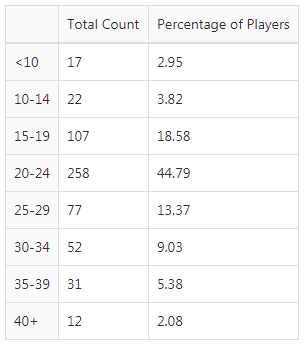

In [15]:
# Establish bins for ages. Uses unique dataframe with duplicate users dropped.
bins = [0, 9, 14, 19, 24, 29, 34, 39, 100]
group_names = ["<10", "10-14", "15-19", "20-24", "25-29","30-34","35-39","40+"]
unique_sn_df["Grouped Age"] = pd.cut(unique_sn_df["Age"], bins, labels=group_names)

# Create dataframe of variables we are interested in
df_age = unique_sn_df[["Age","Grouped Age"]]

# Group by Grouped Age category
df_groupby_age = df_age.groupby("Grouped Age")

# Establish SERIES as variables for calculations
total_count = df_groupby_age["Age"].count()
perc_players = total_count/len(unique_sn_df["Age"])
new_perc_players = perc_players

# Create summary table
age_summary_table = pd.DataFrame({"Total Count": total_count,
                                  "Percentage of Players": new_perc_players
                                    })
age_summary_table = age_summary_table.style.format({'Percentage of Players': "{:.2%}"})
age_summary_table

C:\Users\T430s\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Total Count,Percentage of Players
Grouped Age,,
<10,17,2.95%
10-14,22,3.82%
15-19,107,18.58%
20-24,258,44.79%
25-29,77,13.37%
30-34,52,9.03%
35-39,31,5.38%
40+,12,2.08%


## Purchasing Analysis (Age)

* Bin the purchase_data data frame by age


* Run basic calculations to obtain purchase count, avg. purchase price, avg. purchase total per person etc. in the table below


* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame

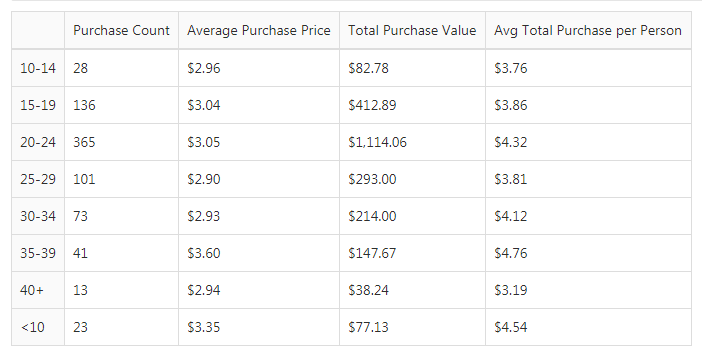

In [16]:
# Establish bins for ages. Uses FULL dataframe data.
heroes_data["Grouped Age"] = pd.cut(heroes_data["Age"], bins, labels=group_names)

# Create dataframe of variables we are interested in
df_purchasing = heroes_data[["Age","Grouped Age","Purchase ID","Price","SN"]]

# This takes the purchasing dataframe, groups by gender, and outputs the counts
df_groupby_age_full = df_purchasing.groupby("Grouped Age")

# Establish all calculations for output
#-------------------------------------#
# These are SERIES to be passed in final dataframe, using the AGE-GROUPED dataframe for each referenced column.

purchase_count2 = df_groupby_age_full["Age"].count()

avg_purchase_price2 = df_groupby_age_full["Price"].mean()
new_purchase_price2 = avg_purchase_price2.map('${:,.2f}'.format)

total_purchase_value2 = df_groupby_age_full["Price"].sum()
new_purchase_value2 = total_purchase_value2.map('${:,.2f}'.format)

unique2 = df_groupby_age_full["SN"].nunique()

avg_purchase_pp2 = total_purchase_value2/unique2
new_purchase_pp2 = avg_purchase_pp2.map('${:,.2f}'.format)

#Create summary table
purchase_summary_table2 = pd.DataFrame({"Purchase Count": purchase_count2,
                                        "Average Purchase Price": new_purchase_price2,
                                        "Total Purchase Value": new_purchase_value2,
                                        "Average Total Purchase Per Person": new_purchase_pp2
                                     })

purchase_summary_table2

,Purchase Count,Average Purchase Price,Total Purchase Value,Average Total Purchase Per Person
Grouped Age,,,,
<10,23,$3.35,$77.13,$4.54
10-14,28,$2.96,$82.78,$3.76
15-19,136,$3.04,$412.89,$3.86
20-24,365,$3.05,"$1,114.06",$4.32
25-29,101,$2.90,$293.00,$3.81
30-34,73,$2.93,$214.00,$4.12
35-39,41,$3.60,$147.67,$4.76
40+,13,$2.94,$38.24,$3.19


## Top Spenders

* Run basic calculations to obtain the results in the table below


* Create a summary data frame to hold the results


* Sort the total purchase value column in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the summary data frame

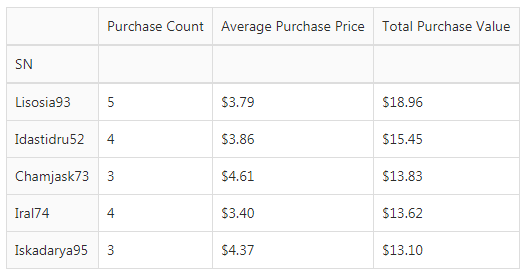



In [17]:
# Create dataframe of variables we are interested in
df_top_spenders = heroes_data[["Price","SN"]]

#This takes the spenders dataframe, groups by User (SN)
df_groupby_spenders = df_top_spenders.groupby("SN")

# Establish all calculations for output
#-------------------------------------#
# These are SERIES to be passed in final dataframe, using the SN-GROUPED dataframe for each referenced column.

purchase_count3 = df_groupby_spenders["SN"].count()
avg_purchase_price3 = df_groupby_spenders["Price"].mean()
total_purchase_value3 = df_groupby_spenders["Price"].sum()

#Create summary table
purchase_summary_table3 = pd.DataFrame({"Purchase Count": purchase_count3,
                                        "Average Purchase Price": avg_purchase_price3,
                                        "Total Purchase Value": total_purchase_value3
                                     })

# Now sort table by highest Total Purchase Value, display top 5, then format
# NOTE: In this case, we must format the columns AFTER sorting values

purchase_sorted = purchase_summary_table3.sort_values("Total Purchase Value", ascending=False)
purchase_sorted = purchase_sorted.head()
purchase_sorted = purchase_sorted.style.format({"Average Purchase Price":"${:,.2f}","Total Purchase Value": "${:,.2f}"})
purchase_sorted

,Purchase Count,Average Purchase Price,Total Purchase Value
SN,,,
Lisosia93,5,$3.79,$18.96
Idastidru52,4,$3.86,$15.45
Chamjask73,3,$4.61,$13.83
Iral74,4,$3.40,$13.62
Iskadarya95,3,$4.37,$13.10


## Most Popular Items

* Retrieve the Item ID, Item Name, and Item Price columns


* Group by Item ID and Item Name. Perform calculations to obtain purchase count, item price, and total purchase value


* Create a summary data frame to hold the results


* Sort the purchase count column in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the summary data frame

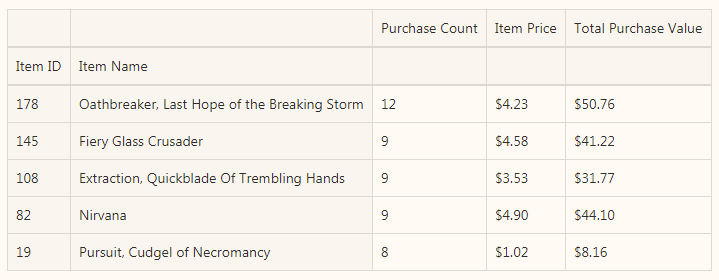

In [18]:
# Create dataframe of variables we are interested in
df_most_popular = heroes_data[["Item ID","Item Name","Price"]]

# This takes the spenders dataframe, groups by Item ID & Name
df_groupby_popular = df_most_popular.groupby(['Item ID', 'Item Name'])

# Establish all calculations for output
#-------------------------------------#
# These are SERIES to be passed in final dataframe, using the SN-GROUPED dataframe for each referenced column.

purchase_count4 = df_groupby_popular["Item Name"].count()
item_price = df_groupby_popular["Price"].mean()
total_purchase_value4 = df_groupby_popular["Price"].sum()

# Create summary table
purchase_summary_table4 = pd.DataFrame({"Purchase Count": purchase_count4,
                                         "Item Price": item_price,
                                         "Total Purchase Value": total_purchase_value4,
                                      })

# Now sort table by purchase count in descending order, display top 5, and format
popular_sorted = purchase_summary_table4.sort_values("Purchase Count", ascending=False)
popular_sorted = popular_sorted.head()
popular_sorted = popular_sorted.style.format({"Item Price":"${:,.2f}","Total Purchase Value": "${:,.2f}"})
popular_sorted

,,Purchase Count,Item Price,Total Purchase Value
Item ID,Item Name,,,
178,"Oathbreaker, Last Hope of the Breaking Storm",12,$4.23,$50.76
145,Fiery Glass Crusader,9,$4.58,$41.22
108,"Extraction, Quickblade Of Trembling Hands",9,$3.53,$31.77
82,Nirvana,9,$4.90,$44.10
19,"Pursuit, Cudgel of Necromancy",8,$1.02,$8.16


## Most Profitable Items

* Sort the above table by total purchase value in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the data frame

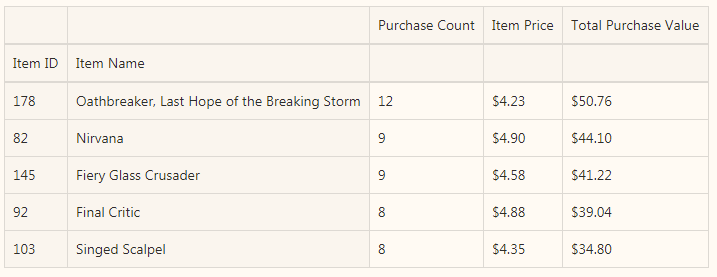

In [14]:
# Now sort table by purchase value in descending order
popular_sorted = purchase_summary_table4.sort_values("Total Purchase Value", ascending=False)
popular_sorted = popular_sorted.head()
popular_sorted = popular_sorted.style.format({"Item Price":"${:,.2f}","Total Purchase Value": "${:,.2f}"})
popular_sorted

,,Purchase Count,Item Price,Total Purchase Value
Item ID,Item Name,,,
178,"Oathbreaker, Last Hope of the Breaking Storm",12,$4.23,$50.76
82,Nirvana,9,$4.90,$44.10
145,Fiery Glass Crusader,9,$4.58,$41.22
92,Final Critic,8,$4.88,$39.04
103,Singed Scalpel,8,$4.35,$34.80
